In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from fastbook import *

In [1]:
from fastai.vision.widgets import *

In [6]:
doc(search_images_ddg)

In [8]:
??search_images_ddg

Signature: search_images_ddg(term, max_images=200)
Source:   
def search_images_ddg(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    headers = dict(referer='https://duckduckgo.com/')
    while len(urls)<max_images and 'next' in data:
        try:
            res = urlread(requestUrl, data=params, headers=headers)
            data = json.loads(res) if res else {}
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(1)
    return L(urls)[:max_images]
File:      /usr/local/lib/py

In [11]:
results = search_images_ddg("grizzly bear")
results

(#200) ['http://www.stillofthemoment.com/galleries/images/YNPGR102008_CATCH_UP_800.jpg','https://pixnio.com/free-images/fauna-animals/bears/grizzly-bear-brown-bear-363x544.jpg','https://s3.wp.wsu.edu/uploads/sites/2797/2022/09/grizzly-bear-log.jpg','http://bramanswanderings.files.wordpress.com/2012/07/20120702-181752.jpg','https://pixy.org/src/24/thumbs350/242035.jpg','http://images2.fanpop.com/image/photos/13100000/Grizzly-Bears-animals-13128594-1024-786.jpg','https://localnews8.b-cdn.net/2023/05/grizzly-bear-399-o5-16-23-sml_crop__NPS-PhotoC.-Adams.jpeg','https://images4.alphacoders.com/779/779089.jpg','https://3.bp.blogspot.com/_VgXaDXiFvX4/TOLc3PVN7cI/AAAAAAAAA9U/ZTTZmy3MkYk/s1600/Grizzly_Bear+1.jpg','https://s-media-cache-ak0.pinimg.com/736x/b7/aa/2c/b7aa2cd08de91b564b6c3726e95cc9b7.jpg','http://1.bp.blogspot.com/-w5GV4m7FHGM/UNMpm4-8wKI/AAAAAAAAADQ/BRvpfJuavsc/s1600/grizzly+bear-01.jpg','https://thumbnails.cbc.ca/maven_legacy/thumbnails/563/587/unnamed.jpg?crop=1.777xh:h;*,*&down

In [11]:
type(results)

fastcore.foundation.L

In [12]:
len(results)

200

**Note:** `max_images` in `search_images_ddg` is default as 200. 

In [13]:
results[0]

'https://d3e1m60ptf1oym.cloudfront.net/bd356692-8453-4499-967a-744665d9d983/L26068-FR-01_uxga.jpg'

In [12]:
dest = "images/grizzly.jpg"
download_url(results[0], dest)

Path('images/grizzly.jpg')

In [10]:
!ls

images


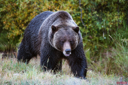

In [17]:
im = Image.open(dest)
im.to_thumb(128,128)

In [4]:
bear_types = "grizzly", "black", "teddy"
path = Path("bears")

In [5]:
bear_types

('grizzly', 'black', 'teddy')

In [20]:
type(bear_types)

tuple

In [21]:
path

Path('bears')

In [22]:
results.attrgot("contentUrl")

(#200) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [6]:
if not path.exists(): 
    path.mkdir()

    for o in bear_types: 
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f"{o} bear")
        download_images(dest, urls=results)

In [24]:
!ls

bears  images


In [25]:
!ls ./bears

black  grizzly	teddy


In [28]:
!ls ./bears/black | wc -l

187


In [29]:
!ls ./bears/grizzly | wc -l

185


In [30]:
!ls ./bears/teddy | wc -l

191


In [7]:
fns = get_image_files(path)
fns

(#559) [Path('bears/black/965a251c-903f-4559-b646-a8d1f385ed36.jpg'),Path('bears/black/0008b63f-32c5-4884-ae35-6ae7f898048b.jpg'),Path('bears/black/67153430-5888-4909-a6dd-69688127b5f3.jpg'),Path('bears/black/f04f0842-03af-40a9-8711-331a9647bd5c.jpg'),Path('bears/black/c065b16f-db0f-4009-b101-867507a5697e.jpg'),Path('bears/black/080e041b-d7b6-4879-a34f-d24d8f2430e9.jpg'),Path('bears/black/58eca497-2763-4f29-94b7-07ddde635639.jpg'),Path('bears/black/9a8f15ee-9c37-4363-b96c-722a71dfa16f.jpg'),Path('bears/black/25186c02-0f94-41e2-9830-99d65528db13.jpeg'),Path('bears/black/2b69f0df-6231-4122-84fb-9c25b5564779.jpg'),Path('bears/black/98b1e13f-de62-4b2b-9d99-7602ef72ebd4.jpg'),Path('bears/black/6d157344-916b-435a-9ca2-bc8e0bbeb009.jpg'),Path('bears/black/b16b385d-ef5d-476a-b4d4-b6e52c7fb095.jpg'),Path('bears/black/d25641b7-2eb3-4a80-bca7-434da82dce96.jpg'),Path('bears/black/879e6959-f7b7-4042-95a0-c351b1429c9f.jpg'),Path('bears/black/938eff9e-6c4c-40ca-b6f0-05434cdba898.jpg'),Path('bears/bla

In [32]:
len(fns)

558

In [8]:
failed = verify_images(fns)
failed

(#33) [Path('bears/black/89871ebb-e977-475c-8384-3b69bc2fb390.jpg'),Path('bears/black/c4b73709-b24d-44af-b86e-298e5e91c807.jpg'),Path('bears/black/4c1f380b-c2d9-43f0-9bbe-14310830eaeb.jpg'),Path('bears/black/53fc8c04-aa24-4a5f-b235-c226aa507bb6.jpg'),Path('bears/black/8c9ff823-4c97-47b6-878e-1d2339c9f9f8.jpg'),Path('bears/grizzly/694f00da-3fad-4025-b9b3-147bcd977937.JPG'),Path('bears/grizzly/46099e2c-1a9a-433d-a4d5-fc4ab4cce153.jpg'),Path('bears/grizzly/a036f97d-ee06-4a0b-bbd2-397c80364e91.png'),Path('bears/grizzly/1c0d4d0f-e988-40e9-819e-b881afa6d129.jpg'),Path('bears/grizzly/ee57a043-d005-4e92-b6ca-e2d7d8885d3d.jpg'),Path('bears/grizzly/0b01378f-745e-49b4-977c-d7dd105db12f.jpg'),Path('bears/grizzly/e634d123-1f24-4015-8ee3-42f3b878db52.jpg'),Path('bears/grizzly/459f1318-7647-468d-b6d4-4197ff6e3776.JPG'),Path('bears/grizzly/5d07c767-a191-4ecc-ad77-cbcf91e3f34c.jpg'),Path('bears/teddy/b8c88ad5-6e74-4e58-92bd-c659411de005.jpg'),Path('bears/teddy/9eb910e0-ea39-486e-b285-afcdab369ec1.jpg')

In [34]:
len(failed)

31

In [9]:
failed.map(Path.unlink)

(#33) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [36]:
!ls ./bears/black | wc -l
!ls ./bears/grizzly | wc -l
!ls ./bears/teddy | wc -l

177
178
177


In [30]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), 
    get_y=parent_label, 
    item_tfms=Resize(128)
)

In [21]:
bears

In [12]:
doc(get_image_files)

In [13]:
??get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      /usr/local/lib/python3.11/dist-packages/fastai/data/transforms.py
Type:      function


In [14]:
path

Path('bears')

In [16]:
doc(RandomSplitter)

In [15]:
??RandomSplitter

Signature: RandomSplitter(valid_pct=0.2, seed=None)
Source:   
def RandomSplitter(valid_pct=0.2, seed=None):
    "Create function that splits `items` between train/val with `valid_pct` randomly."
    def _inner(o):
        if seed is not None: torch.manual_seed(seed)
        rand_idx = L(list(torch.randperm(len(o)).numpy()))
        cut = int(valid_pct * len(o))
        return rand_idx[cut:],rand_idx[:cut]
    return _inner
File:      /usr/local/lib/python3.11/dist-packages/fastai/data/transforms.py
Type:      function


In [17]:
??parent_label

Signature: parent_label(o)
Source:   
def parent_label(o):
    "Label `item` with the parent folder name."
    return Path(o).parent.name
File:      /usr/local/lib/python3.11/dist-packages/fastai/data/transforms.py
Type:      function


In [18]:
??ImageDataLoaders.from_name_func

Signature:
ImageDataLoaders.from_name_func(
    path: 'str | Path',
    fnames: 'list',
    label_func: 'callable',
    *,
    valid_pct=0.2,
    seed=None,
    item_tfms=None,
    batch_tfms=None,
    img_cls=<class 'fastai.vision.core.PILImage'>,
    bs: 'int' = 64,
    val_bs: 'int' = None,
    shuffle: 'bool' = True,
    device=None,
) -> 'DataLoaders'
Source:   
    @classmethod
    def from_name_func(cls,
        path:str|Path, # Set the default path to a directory that a `Learner` can use to save files like models
        fnames:list, # A list of `os.Pathlike`'s to individual image files
        label_func:callable, # A function that receives a string (the file name) and outputs a label
        **kwargs
    ) -> DataLoaders:
        "Create from the name attrs of `fnames` in `path`s with `label_func`"
        if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
            # https://medium.com/@jwnx/multiprocessing-serial

In [31]:
dls = bears.dataloaders(path)

In [20]:
dls

In [22]:
doc(bears.dataloaders)

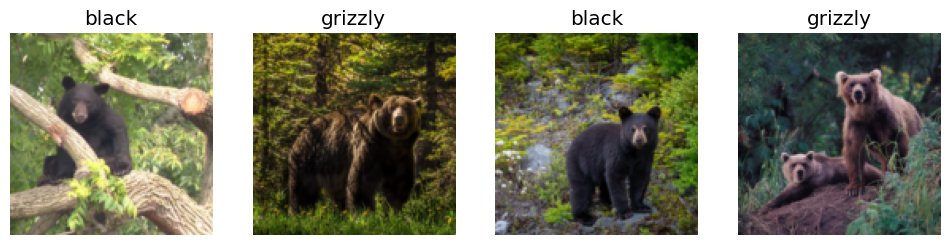

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

In [24]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
bears

In [25]:
dls = bears.dataloaders(path)
dls

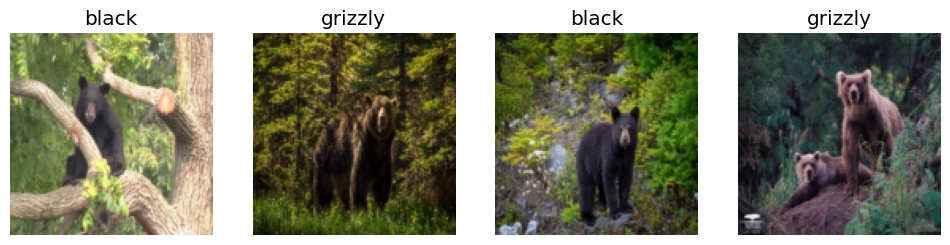

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

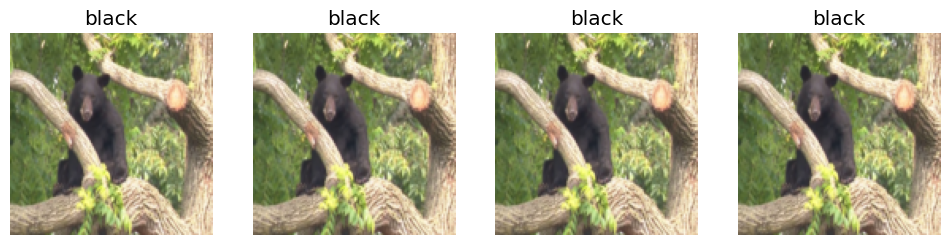

In [81]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.1))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

In [35]:
doc(bears.new)

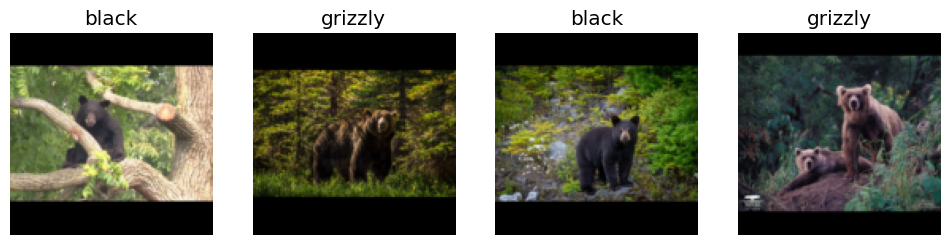

In [39]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

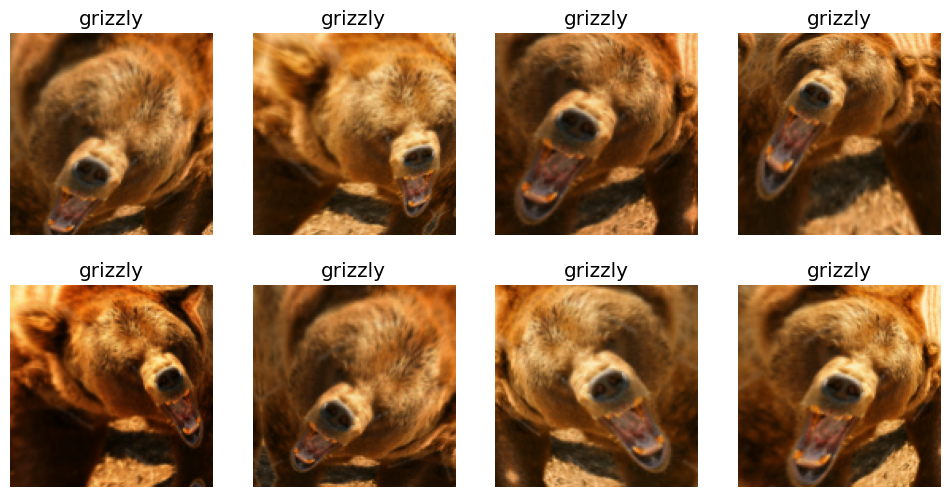

In [41]:
bears = bears.new(
    item_tfms=Resize(128), 
    batch_tfms=aug_transforms(mult=2)
)
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [42]:
doc(aug_transforms)

In [43]:
doc(dls.train.show_batch)

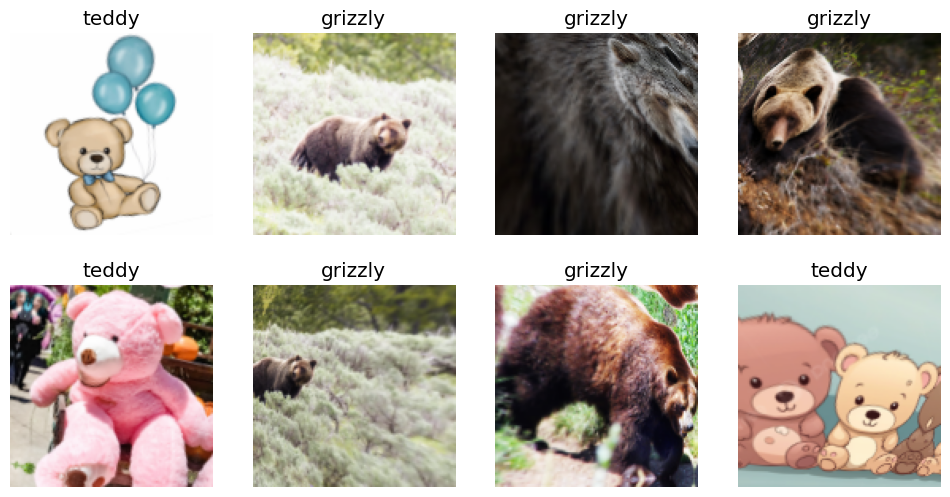

In [44]:
dls.train.show_batch(max_n=8, nrows=2)

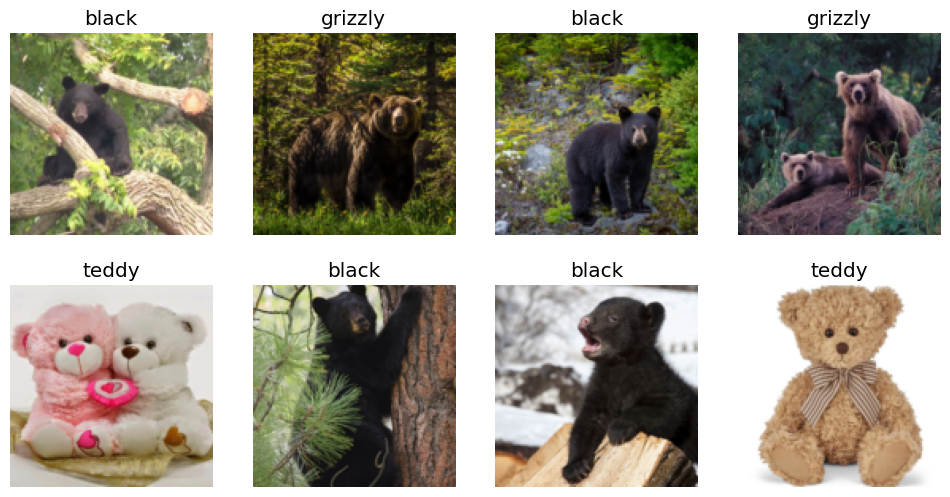

In [45]:
dls.valid.show_batch(max_n=8, nrows=2)

In [46]:
doc(dls.train)

In [47]:
doc(dls.valid)

In [49]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

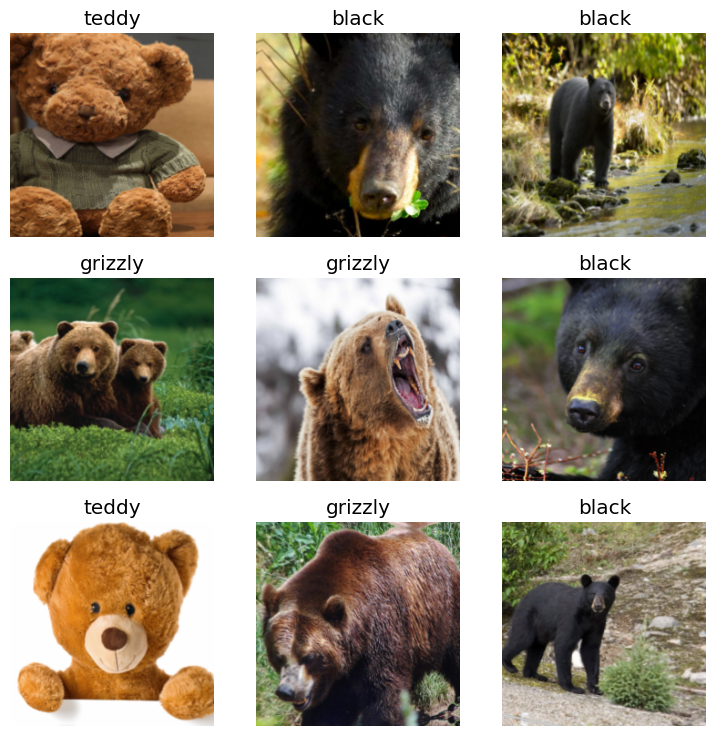

In [50]:
dls.train.show_batch()

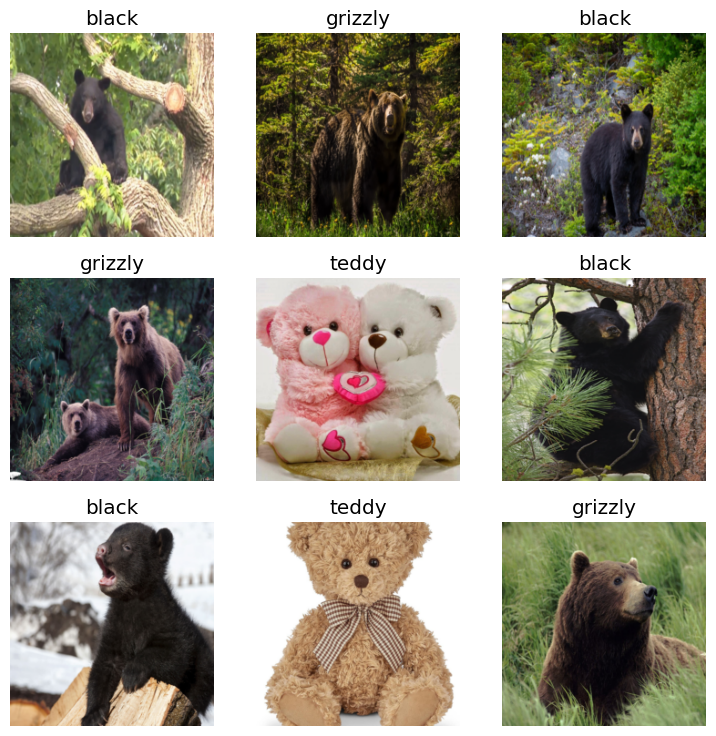

In [51]:
dls.valid.show_batch()

In [52]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


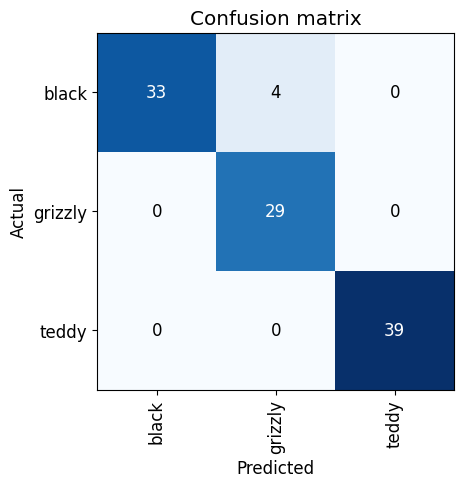

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

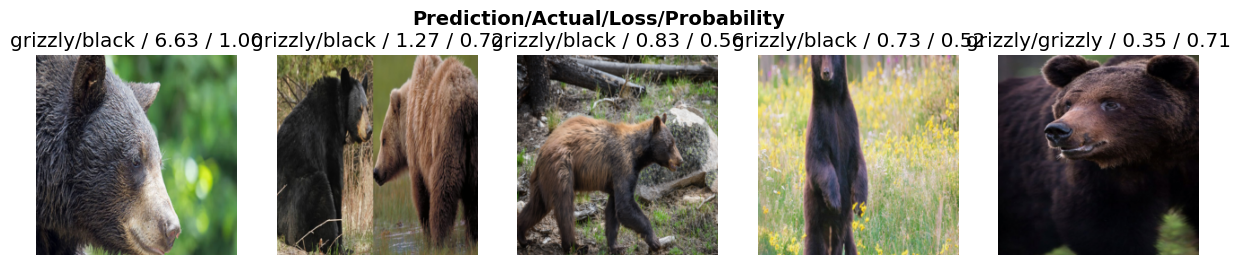

In [54]:
interp.plot_top_losses(5, nrows=1)

In [55]:
??interp

Type:        ClassificationInterpretation
String form: <fastai.interpret.ClassificationInterpretation object at 0x7f1ff5b5a4d0>
File:        /usr/local/lib/python3.11/dist-packages/fastai/interpret.py
Source:     
class ClassificationInterpretation(Interpretation):
    "Interpretation methods for classification models."

    def __init__(self, 
        learn:Learner, 
        dl:DataLoader, # `DataLoader` to run inference over
        losses:TensorBase, # Losses calculated from `dl`
        act=None # Activation function for prediction
    ):
        super().__init__(learn, dl, losses, act)
        self.vocab = self.dl.vocab
        if is_listy(self.vocab): self.vocab = self.vocab[-1]

    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`."
        x = torch.arange(0, len(self.vocab))
        _,targs,decoded = self.learn.get_preds(dl=self.dl, with_decoded=True, with_preds=True, 
                                               with_targs=True, act=self.act)
       

In [59]:
interp.most_confused()

[('black', 'grizzly', 4)]

In [60]:
interp.print_classification_report()

              precision    recall  f1-score   support

       black       1.00      0.89      0.94        37
     grizzly       0.88      1.00      0.94        29
       teddy       1.00      1.00      1.00        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105



In [66]:
!pip install -Uqq jupyterlab ipywidgets jupyterlab-widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 3.10.2 requires jupyterlab<4.0.0a0,>=3.1.0, but you have jupyterlab 4.4.2 which is incompatible.


In [82]:
!pip install ipywidgets==7.6.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.14
    Uninstalling widgetsnbextension-4.0.14:
      Successfully uninstalled widgetsnbextension-4.0.14
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.7
    Uninstalling ipywidgets-8.1.7:
      Successfully uninstalled ipywidgets-8.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.36.0 requires ipywidgets>=7.7.1, but you have ipywidgets 7.6.5 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
bigquery-magics 0.5.0 requires ipywidgets>=7.7.1, but you have ipywidgets 7.6.5 which is incompatible.

In [33]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
cleaner = ImageClassifierCleaner(learn)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
cleaner

[ImageClassifierCleaner not showing images (kaggle)](https://forums.fast.ai/t/imageclassifiercleaner-not-showing-images-kaggle/104567/9)  
-> restart Kggle kernel

In [ ]:
cleaner.delete()

In [ ]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()

In [ ]:
cleaner.change()

In [ ]:
for idx, cat in cleaner.change(): 
    shutil.move(str(cleaner.fns[idx]), path/cat)

In [70]:
learn.export()

In [71]:
!ls

bears  export.pkl


In [72]:
!pwd

/kaggle/working


In [73]:
!zip -r file.zip /kaggle/working/bears

  adding: kaggle/working/bears/ (stored 0%)
  adding: kaggle/working/bears/black/ (stored 0%)
  adding: kaggle/working/bears/black/965a251c-903f-4559-b646-a8d1f385ed36.jpg (deflated 0%)
  adding: kaggle/working/bears/black/0008b63f-32c5-4884-ae35-6ae7f898048b.jpg (deflated 0%)
  adding: kaggle/working/bears/black/67153430-5888-4909-a6dd-69688127b5f3.jpg (deflated 0%)
  adding: kaggle/working/bears/black/f04f0842-03af-40a9-8711-331a9647bd5c.jpg (deflated 0%)
  adding: kaggle/working/bears/black/c065b16f-db0f-4009-b101-867507a5697e.jpg (deflated 0%)
  adding: kaggle/working/bears/black/080e041b-d7b6-4879-a34f-d24d8f2430e9.jpg (deflated 0%)
  adding: kaggle/working/bears/black/58eca497-2763-4f29-94b7-07ddde635639.jpg (deflated 0%)
  adding: kaggle/working/bears/black/9a8f15ee-9c37-4363-b96c-722a71dfa16f.jpg (deflated 0%)
  adding: kaggle/working/bears/black/25186c02-0f94-41e2-9830-99d65528db13.jpeg (deflated 0%)
  adding: kaggle/working/bears/black/2b69f0df-6231-4122-84fb-9c25b5564779.jpg

In [74]:
!ls

bears  export.pkl  file.zip


In [75]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [6]:
path = Path("/kaggle/input/02_fastbook/pytorch/default/1/")

In [7]:
path.ls(file_exts=".pkl")

(#1) [Path('/kaggle/input/02_fastbook/pytorch/default/1/export.pkl')]

In [8]:
learn_inf = load_learner(path/"export.pkl")
learn_inf

In [13]:
learn_inf.predict("images/grizzly.jpg")

('grizzly', tensor(1), tensor([4.8108e-04, 9.9936e-01, 1.5955e-04]))

In [14]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [15]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [16]:
btn_upload = SimpleNamespace(data = ["images/grizzly.jpg"])

In [17]:
img = PILImage.create(btn_upload.data[-1])

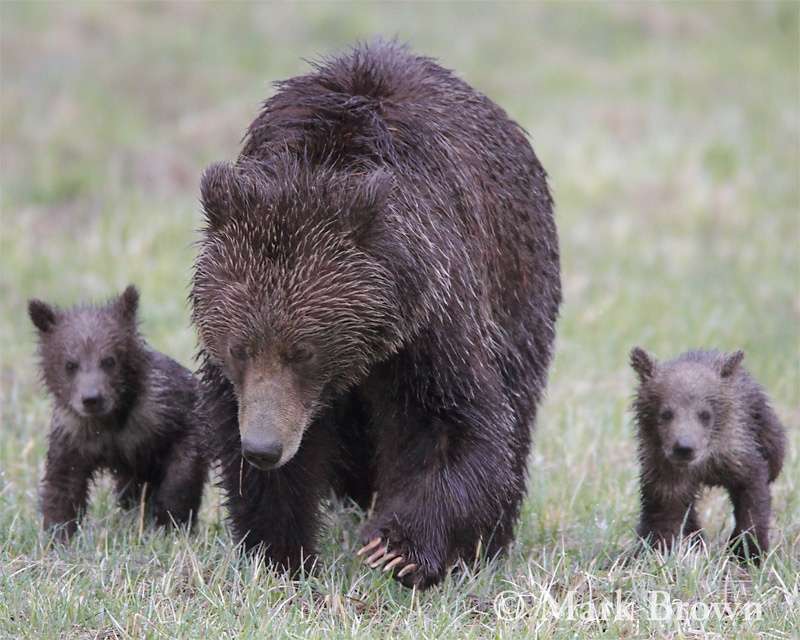

In [18]:
img

In [19]:
btn_upload

namespace(data=['images/grizzly.jpg'])

In [20]:
btn_upload.data

['images/grizzly.jpg']

In [21]:
btn_upload.data[-1]

'images/grizzly.jpg'

In [22]:
out_pl = widgets.Output()

In [23]:
type(out_pl)

ipywidgets.widgets.widget_output.Output

In [24]:
out_pl.clear_output()

In [25]:
with out_pl: 
    display(img.to_thumb(128,128))

In [26]:
out_pl

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<PIL.Image.Image image mode=RGB size=1…

In [27]:
pred, pred_idx, probs = learn_inf.predict(img)

In [28]:
pred, pred_idx, probs

('grizzly', tensor(1), tensor([4.8108e-04, 9.9936e-01, 1.5955e-04]))

In [29]:
lbl_pred = widgets.Label()

In [30]:
lbl_pred

Label(value='')

In [31]:
lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9994')

In [32]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
def on_click_classify(change): 
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: 
        display(img.to_thumb(128,128))
        pred, pred_idx, probs = learn_inf.predict(img)
        lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

In [34]:
btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()

In [36]:
btn_upload

FileUpload(value=(), description='Upload')

In [40]:
VBox(
    [widgets.Label("Select your bear!"), 
    btn_upload, 
    btn_run, 
    out_pl, 
    lbl_pred]
)

In [41]:
!pip install voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.0 MB/s eta 0:00:0000:0100:01


In [42]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
